<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
## **LOAD DATA (FOR REFERENCES): MNIST, FASHION, SPAMBASE, 20NG**


https://en.wikipedia.org/wiki/MNIST_database

http://yann.lecun.com/exdb/mnist/

https://www.kaggle.com/zalando-research/fashionmnist


**Load MNIST**

In [ ]:
from keras.datasets import mnist 
import numpy as np
from sklearn.preprocessing import normalize

# load mnist data
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

# reshape and normalize
mnist_train = np.reshape(mnist_train, (60000, 784)) 
mnist_train = normalize(mnist_train, norm ='max')
mnist_test = np.reshape(mnist_test, (10000, 784))
mnist_test = normalize(mnist_test, norm ='max') 

11493376/11490434 [==============================] - 0s 0us/step


**Load FASHION**

In [ ]:
from keras.datasets import fashion_mnist 
import numpy as np
from sklearn.preprocessing import normalize

# load mnist data
(fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels) = fashion_mnist.load_data()

# reshape and normalize
fashion_train = np.reshape(fashion_train, (60000, 784)) 
fashion_train = normalize(fashion_train, norm ='max')
fashion_test = np.reshape(fashion_test, (10000, 784))
fashion_test = normalize(fashion_test, norm ='max') 

4423680/4422102 [==============================] - 0s 0us/step


**Load 20NG**

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train)).todense()
ng_test = csr_matrix(vectorizer.transform(ng_test)).todense()

**Load SPAMBASE**

In [ ]:
import numpy as np

def parse_data (infile, num_features) -> np.array :
  max_news_index = 0;

  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  X = []
  X_target = []
  for line in lines:
    if line:
      datapoint_vector = []
      for f in range(num_features):
        val = line.split(',')[f]
        if (' ' in val):continue
        else:
          float_val = float(val)
          datapoint_vector.append(float_val)
      datapoint_vector.append(float(line.strip()[-1:]))
      X.append(datapoint_vector)

  return np.array(X)


---
## **PROBLEM 1: Setup Tensor Flow, run few demos**

Install conda virtual environment (optional)
Please follow the instruction in the link below:

https://conda.io/projects/conda/en/latest/user-guide/install/index.html

After you successfully install conda, you can create an environment:

```
conda create --name mynev
```
```
conda activate myenv
```
```
pip install tensorflow
```

```
>>> python 
>>> import tensorflow as tf
>>> print(tf.__version__)
```



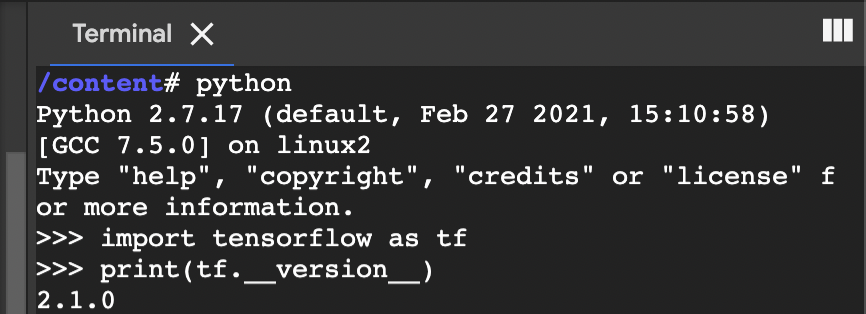

---
## **PROBLEM 2 : NNet supervised classification**


---
### **Section A**

For MNIST dataset, run a TF in supervised mode (train/test) and report results


In [17]:
from keras.datasets import mnist 
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

MNIST Model Representation

In [18]:
import tensorflow as tf
import numpy as np


def preprocess (x, y) :
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64) 
  return x,y

def init_data (xs, ys, n_classes = 10) :
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess)             \
    .shuffle(len(ys))  \
    .batch(128)

tf_mnist_train = init_data(mnist_train, mnist_train_labels)
tf_mnist_validation = init_data(mnist_test, mnist_test_labels)



MNIST Model Hypothesis

In [19]:
import keras

mnist_model = keras.Sequential([
  keras.layers.Reshape( target_shape = (28 * 28,) , input_shape= (28, 28) ), 
  keras.layers.Dense(units = 256, activation = 'relu'),
  keras.layers.Dense(units = 10, activation = 'softmax'),
  keras.layers.Dense(10)
])


MNIST Model Training

In [21]:
mnist_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

mnist_model.fit(
    tf_mnist_train,
    epochs=6,
    validation_data=tf_mnist_validation,
)

Epoch 1/6
469/469 [==============================] - 12s 10ms/step - loss: 1.9264 - sparse_categorical_accuracy: 0.4606 - val_loss: 1.4634 - val_sparse_categorical_accuracy: 0.5857
Epoch 2/6
469/469 [==============================] - 9s 10ms/step - loss: 1.3678 - sparse_categorical_accuracy: 0.5851 - val_loss: 1.1341 - val_sparse_categorical_accuracy: 0.5961
Epoch 3/6
469/469 [==============================] - 9s 10ms/step - loss: 1.0750 - sparse_categorical_accuracy: 0.5905 - val_loss: 0.9515 - val_sparse_categorical_accuracy: 0.5989
Epoch 4/6
469/469 [==============================] - 9s 11ms/step - loss: 0.9128 - sparse_categorical_accuracy: 0.5995 - val_loss: 0.8561 - val_sparse_categorical_accuracy: 0.5992
Epoch 5/6
469/469 [==============================] - 10s 11ms/step - loss: 0.8233 - sparse_categorical_accuracy: 0.6033 - val_loss: 0.7975 - val_sparse_categorical_accuracy: 0.6026
Epoch 6/6
469/469 [==============================] - 9s 10ms/step - loss: 0.7654 - sparse_categori

In [41]:
predictions = mnist_model.predict(mnist_test)
for i in range(10):
  print("prediction : ", np.argmax(predictions[i]), "  |  ", "actual label  : ", mnist_test_labels[i])

prediction :  7   |   actual label  :  7
prediction :  2   |   actual label  :  2
prediction :  1   |   actual label  :  1
prediction :  0   |   actual label  :  0
prediction :  7   |   actual label  :  4
prediction :  1   |   actual label  :  1
prediction :  7   |   actual label  :  4
prediction :  7   |   actual label  :  9
prediction :  3   |   actual label  :  5
prediction :  7   |   actual label  :  9


MNIST Predicting Test Data

---
### **Section B**

TF classification for 20NG


In [50]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train))
ng_test = csr_matrix(vectorizer.transform(ng_test))

print (ng_train.shape)

(11314, 130107)


In [38]:
import tensorflow as tf
import numpy as np

def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)


def init_data (xs, ys, n_classes = 20) :
  xs = convert_sparse_matrix_to_sparse_tensor(xs)
  xs = tf.sparse.reorder(xs)
  # ys is not dense and does not need conversion
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .shuffle(len(ys))  \
    .batch(2)

tf_ng_train = init_data(ng_train, ng_train_labels)
tf_ng_validation = init_data(ng_test, ng_test_labels)


aaaa
aaaa


In [39]:
import keras

ng_model = keras.Sequential([
  keras.layers.Dense(units = 36, activation = 'relu'),
  keras.layers.Dense(units = 20, activation = 'softmax'),
])


In [42]:
ng_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
 
ng_model.fit(
    tf_ng_train,
    epochs=10,
    batch_size = 2,
    validation_data=tf_ng_validation,
)

Epoch 1/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.1361 - sparse_categorical_accuracy: 0.9791 - val_loss: 0.5184 - val_sparse_categorical_accuracy: 0.8579
Epoch 2/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9970 - val_loss: 0.5194 - val_sparse_categorical_accuracy: 0.8516
Epoch 3/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.0059 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.5479 - val_sparse_categorical_accuracy: 0.8516
Epoch 4/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.0037 - sparse_categorical_accuracy: 0.9990 - val_loss: 0.5948 - val_sparse_categorical_accuracy: 0.8517
Epoch 5/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.0043 - sparse_categorical_accuracy: 0.9987 - val_loss: 0.6547 - val_sparse_categorical_accuracy: 0.8437
Epoch 6/10
5657/5657 [==============================] - 56s 10ms/step - loss: 0.

In [51]:
ng_test = convert_sparse_matrix_to_sparse_tensor(ng_test)
ng_test = tf.sparse.reorder(ng_test)
predictions = ng_model.predict(ng_test)

for i in range(20):
  print("prediction : ", np.argmax(predictions[i]), "  |  ", "actual label  : ", ng_test_labels[i])

prediction :  3   |   actual label  :  7
prediction :  1   |   actual label  :  5
prediction :  0   |   actual label  :  0
prediction :  17   |   actual label  :  17
prediction :  0   |   actual label  :  19
prediction :  13   |   actual label  :  13
prediction :  15   |   actual label  :  15
prediction :  2   |   actual label  :  15
prediction :  5   |   actual label  :  5
prediction :  1   |   actual label  :  1
prediction :  2   |   actual label  :  2
prediction :  5   |   actual label  :  5
prediction :  17   |   actual label  :  17
prediction :  8   |   actual label  :  8
prediction :  15   |   actual label  :  0
prediction :  3   |   actual label  :  2
prediction :  2   |   actual label  :  4
prediction :  1   |   actual label  :  1
prediction :  12   |   actual label  :  6
prediction :  16   |   actual label  :  16


---
### **Section C**

Extra Credit. Run TF classification for MNIST using an Nvidia GPU



---
## **PROBLEM 3 : Autoencoders**
For each one of the datasets MNIST, 20NG, SPAMBASE, FASHION, run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?). 

Verify the obtained re-encoding of data (the new feature representation) in several ways:

*   repeat a classification train/test task , or a clustering task
*   examine the new pairwise distances dist(i,j) agains the old distances obtained with original features (sample 100 pairs of related words)
*   examine the top 20 neighbours (by new distance) set overlap with old neighbours, per datapoint
*  for images, rebuild the image form output layer and draw to look at it

https://www.youtube.com/watch?v=3jmcHZq3A5s



---
### **Section A : MNIST**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


Create an Autoencoder Neuro Network

This network will contain 3 layers and specify the shape of each layer's input nad output

This step basically creates a frame for what we are about to define in the next step

In [49]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 15  # number of nodes in the hidden encoded layer

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


We create the models of the encoder and decoder in this step

Model class groups previously defined layers into an object with training and inference features.


In [50]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (middle layer) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Import and preprocess MNIST data

In [51]:
from keras.datasets import mnist
import numpy as np
(mnist_train, _), (mnist_test, mnist_test_labels) = mnist.load_data()

mnist_train = mnist_train.astype('float32') / 255.
mnist_test = mnist_test.astype('float32') / 255.
mnist_train = mnist_train.reshape((len(mnist_train), np.prod(mnist_train.shape[1:])))
mnist_test = mnist_test.reshape((len(mnist_test), np.prod(mnist_test.shape[1:])))
print(mnist_train.shape)
print(mnist_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [52]:
autoencoder.fit(mnist_train, mnist_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_test, mnist_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4196 - val_loss: 0.2252
Epoch 2/50
235/235 [==============================] - 1s 2ms/step - loss: 0.2136 - val_loss: 0.1829
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1791 - val_loss: 0.1663
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1647 - val_loss: 0.1555
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1546 - val_loss: 0.1484
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1490 - val_loss: 0.1445
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1456 - val_loss: 0.1422
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1433 - val_loss: 0.1403
Epoch 9/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1409 - val_loss: 0.1388
Epoch 10/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1400 - val_loss: 0.1373

Using encoder and decoder to predict test images

In [53]:
encoded_imgs = encoder.predict(mnist_test)
decoded_imgs = decoder.predict(encoded_imgs)

Create visuals to evaluate prediction results
Top Row is the original 

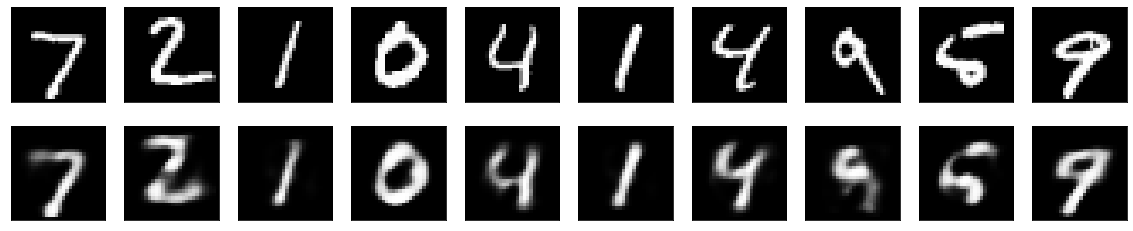

In [54]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

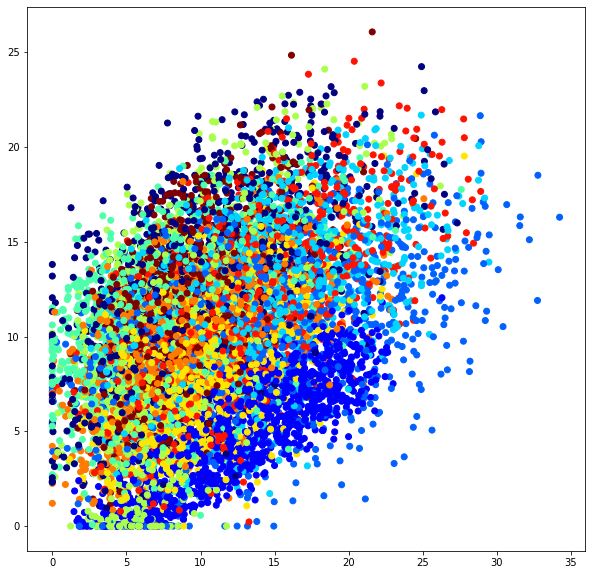

In [55]:
x_test_encoded = encoder.predict(mnist_test, batch_size=32)
plt.figure(figsize=(10, 10))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=mnist_test_labels,  cmap=plt.cm.jet)
plt.show()

When k is small, the hidden encoded layer is small. A lot of information loss occurs when trying to reconstruct the original image from a small hidden enocded layer. Therefore the model fails to learn correctly. When k is a large number, the hidden encoded layer is big. A large percentage of the information is retained and encoding occurs without the pushing through a bottle neck. Therefore the model fails to learn anything meaningful.

---
### **Section B : FASHION**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


Create an Autoencoder Neuro Network

This network will contain 3 layers and specify the shape of each layer's input nad output

This step basically creates a frame for what we are about to define in the next step

In [56]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 50  # number of nodes in the hidden encoded layer

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


We create the models of the encoder and decoder in this step

Model class groups previously defined layers into an object with training and inference features.


In [57]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (middle layer) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Import and preprocess FASHION data

In [58]:
from keras.datasets import fashion_mnist
import numpy as np
(fashion_train, _), (fashion_test, fashion_test_labels) = fashion_mnist.load_data()

fashion_train = fashion_train.astype('float32') / 255.
fashion_test = fashion_test.astype('float32') / 255.
fashion_train = fashion_train.reshape((len(fashion_train), np.prod(fashion_train.shape[1:])))
fashion_test = fashion_test.reshape((len(fashion_test), np.prod(fashion_test.shape[1:])))
print(fashion_train.shape)
print(fashion_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


Train Model

In [59]:
autoencoder.fit(fashion_train, fashion_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(fashion_test, fashion_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.4889 - val_loss: 0.3322
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3234 - val_loss: 0.3105
Epoch 3/50
235/235 [==============================] - 1s 2ms/step - loss: 0.3055 - val_loss: 0.3007
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2953 - val_loss: 0.2923
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2891 - val_loss: 0.2882
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2857 - val_loss: 0.2855
Epoch 7/50
235/235 [==============================] - 1s 2ms/step - loss: 0.2831 - val_loss: 0.2837
Epoch 8/50
235/235 [==============================] - 1s 2ms/step - loss: 0.2813 - val_loss: 0.2822
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2805 - val_loss: 0.2812
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2787 - val_loss: 0.2803

Using encoder and decoder to predict test images

In [60]:
encoded_imgs = encoder.predict(fashion_test)
decoded_imgs = decoder.predict(encoded_imgs)

Create visuals to evaluate prediction results
Top Row is the original 

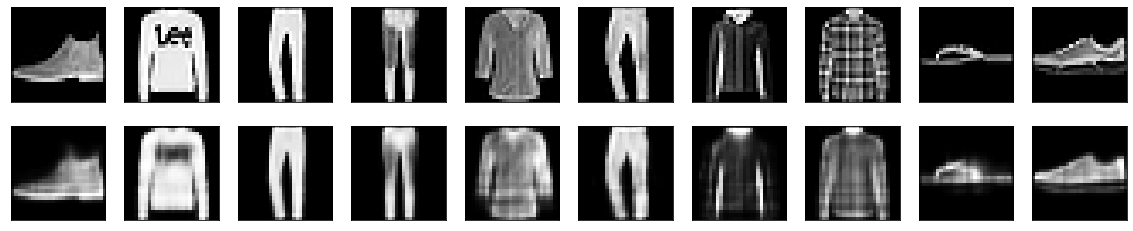

In [61]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(fashion_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

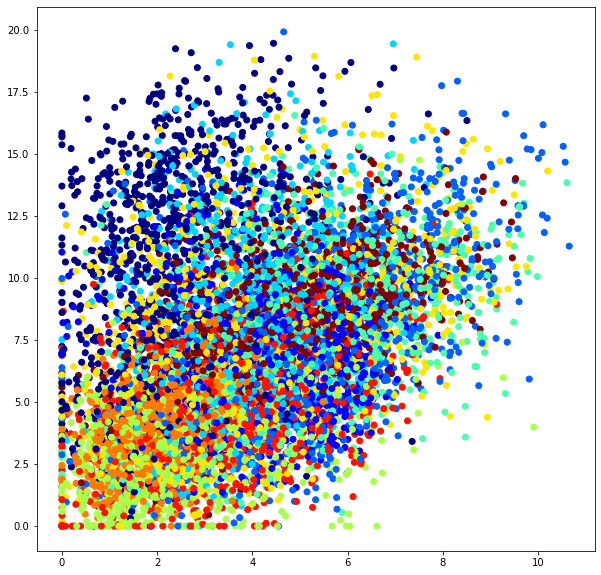

In [62]:
x_test_encoded = encoder.predict(fashion_test, batch_size=256)
plt.figure(figsize=(10, 10))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=fashion_test_labels,  cmap=plt.cm.jet)
plt.show()

When k is small, the hidden encoded layer is small. A lot of information loss occurs when trying to reconstruct the original image from a small hidden enocded layer. Therefore the model fails to learn correctly. When k is a large number, the hidden encoded layer is big. A large percentage of the information is retained and encoding occurs without the pushing through a bottle neck. Therefore the model fails to learn anything meaningful.

---
### **Section C : SPAMBASE**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


Create an Autoencoder Neuro Network

This network will contain 3 layers and specify the shape of each layer's input nad output

This step basically creates a frame for what we are about to define in the next step

In [9]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 3  # number of nodes in the hidden encoded layer

# This is our input data point - each spam has 57 features
input_img = keras.Input(shape=(57,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(57, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


We create the models of the encoder and decoder in this step

Model class groups previously defined layers into an object with training and inference features.


In [10]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (middle layer) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Import and preprocess MNIST data

In [11]:
import numpy as np

def parse_data (infile, num_features) -> np.array :
  max_news_index = 0;

  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  X = []
  X_target = []
  for line in lines:
    if line:
      datapoint_vector = []
      for f in range(num_features):
        val = line.split(',')[f]
        if (' ' in val):continue
        else:
          float_val = float(val)
          datapoint_vector.append(float_val)
      datapoint_vector.append(float(line.strip()[-1:]))
      X.append(datapoint_vector)

  return np.array(X)

spam_data = parse_data("/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/spambase.data", 57)
spam_train = spam_data[ :4000 ,:-1]
spam_train_labels = spam_data[ :4000 , -1:]
spam_test = spam_data[ 4000: ,:-1]
spam_test_labels = spam_data[ 4000: ,:-1]

print(spam_train.shape)
print(spam_test.shape)


(4000, 57)
(601, 57)


In [12]:
autoencoder.fit(spam_train, spam_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(spam_test, spam_test))

Epoch 1/200
16/16 [==============================] - 0s 9ms/step - loss: 108.1593 - val_loss: 6.7916
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 92.3817 - val_loss: 4.9937
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 57.5023 - val_loss: 3.6979
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 46.8106 - val_loss: 2.6224
Epoch 5/200
16/16 [==============================] - 0s 3ms/step - loss: 26.2354 - val_loss: 1.8200
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 18.4753 - val_loss: 1.1997
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 8.2254 - val_loss: 0.7838
Epoch 8/200
16/16 [==============================] - 0s 4ms/step - loss: 4.2939 - val_loss: 0.4841
Epoch 9/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6966 - val_loss: 0.3629
Epoch 10/200
16/16 [==============================] - 0s 3ms/step - loss: -0.3033 - val_loss: 0.3244
E

In [13]:
encoded_spam = encoder.predict(spam_test)
decoded_spam = decoder.predict(encoded_spam)

In [14]:
from sklearn.metrics.pairwise import cosine_similarity as dist
import numpy as np

print(spam_test.shape)
print(decoded_spam.shape)

for i in range(100):
  prediction = decoded_spam[i].reshape(1, -1)
  test = spam_test[i].reshape(1, -1)
  print(dist(prediction, test))


(601, 57)
(601, 57)
[[0.46378997]]
[[0.49323158]]
[[0.42332973]]
[[0.59395902]]
[[0.46404422]]
[[0.46439434]]
[[0.52997674]]
[[0.42233427]]
[[0.39796107]]
[[0.49688173]]
[[0.5323321]]
[[0.44865501]]
[[0.3810613]]
[[0.47045183]]
[[0.40898836]]
[[0.43824792]]
[[0.44841249]]
[[0.51733493]]
[[0.40049413]]
[[0.57567099]]
[[0.57799844]]
[[0.41651542]]
[[0.56818085]]
[[0.43081851]]
[[0.45907715]]
[[0.42937151]]
[[0.42777778]]
[[0.38822699]]
[[0.49957692]]
[[0.4584453]]
[[0.67748071]]
[[0.42211166]]
[[0.44711159]]
[[0.49378046]]
[[0.47200233]]
[[0.42389094]]
[[0.46162419]]
[[0.58858803]]
[[0.55930136]]
[[0.57290381]]
[[0.59741325]]
[[0.44479227]]
[[0.46923864]]
[[0.43208626]]
[[0.47689085]]
[[0.27961021]]
[[0.46538486]]
[[0.49334372]]
[[0.40058698]]
[[0.42726387]]
[[0.45676116]]
[[0.6240549]]
[[0.44413652]]
[[0.48562072]]
[[0.46713735]]
[[0.44033422]]
[[0.44745083]]
[[0.42230092]]
[[0.49610867]]
[[0.42123486]]
[[0.51548509]]
[[0.46527178]]
[[0.5131694]]
[[0.42306458]]
[[0.39838286]]
[[0.518554

---
### **Section D : 20NG**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).



---
## **PROBLEM 4 : Word Vectors**
On 20NG, run word-verctors embedding into 300 dimensions using a Tensor Flow setup. Evaluate in two ways:

*   given a word (from TA live during the demo), output the most similar 20 words based on embedding distance of your choice like cosine, euclidian, etc. Compare the 20 most similar words with the top 20 words by distance on Google word embeddings ( word2vec embeddings)
*   use a visulaizer that loads your embedding, projects it in 3 dimmensions and displays the words, for example TF projector

https://code.google.com/archive/p/word2vec/

http://projector.tensorflow.org/



In [52]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train))
ng_test = csr_matrix(vectorizer.transform(ng_test))

print (ng_train.shape)

(11314, 130107)


In [77]:
import tensorflow as tf
import numpy as np

def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)


def init_data (xs, ys, n_classes = 20) :
  xs = convert_sparse_matrix_to_sparse_tensor(xs)
  xs = tf.sparse.reorder(xs)
  # ys is not dense and does not need conversion
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .shuffle(len(ys))  \
    .batch(2)

tf_ng_train = init_data(ng_train, ng_train_labels)
tf_ng_validation = init_data(ng_test, ng_test_labels)




Configure the dataset for performance

These are two important methods you should use when loading data to make sure that I/O does not become blocking.

.cache() keeps data in memory after it's loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

.prefetch() overlaps data preprocessing and model execution while training.


https://www.tensorflow.org/guide/data_performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
tf_ng_train = tf_ng_train.cache().prefetch(buffer_size=AUTOTUNE)
tf_ng_validation = tf_ng_validation.cache().prefetch(buffer_size=AUTOTUNE)

Define some methods that act as a preprocess layer before embedding layer

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

#Create a custom standardization function to strip HTML break tags '<br />'.
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), '')

# Vocabulary size and number of words in a sequence.
vocab_size = 10000
sequence_length = 100

# Use the text vectorization layer to normalize, split, and map strings to 
# integers. Note that the layer uses the custom standardization defined above. 
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = tf_ng_train.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

Using the Embedding layer

Keras makes it easy to use word embeddings. Take a look at the Embedding layer.

The Embedding layer can be understood as a lookup table that maps from integer indices (which stand for specific words) to dense vectors (their embeddings). 

The dimensionality (or width) of the embedding is a parameter you can experiment with to see what works well for your problem, much in the same way you would experiment with the number of neurons in a Dense layer.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

In [78]:
from tensorflow import TensorShape

embedding_dim=16

#Embed a 10,000 word vocabulary into 300 dimensions.
embedding_layer = tf.keras.layers.Embedding(10000, embedding_dim)


Run embedding_layer on a small sample as demonstration

When given a batch of sequences as input, an embedding layer returns a 3D floating point tensor, of shape (samples, sequence_length, embedding_dimensionality).

In [84]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
result.shape


TensorShape([2, 3, 16])

In [85]:
result.numpy()

array([[[-0.04838195, -0.00628756, -0.00338919, -0.00490307,
         -0.01780461,  0.03510368, -0.03173611, -0.03228436,
          0.01077085, -0.03892564,  0.01441247, -0.01618543,
          0.00908108, -0.00822512,  0.02821043, -0.0008675 ],
        [ 0.03258542, -0.00748614, -0.03217149,  0.00530916,
         -0.02701721, -0.0288178 ,  0.04496734, -0.02477188,
         -0.03316673,  0.01697451, -0.00703428,  0.02265209,
          0.03893587,  0.01833678, -0.04608196,  0.03572321],
        [-0.03724158, -0.02952609, -0.01956348, -0.01749265,
         -0.04091737,  0.04694063, -0.00245261,  0.04997975,
          0.01990109,  0.0126642 ,  0.00857977,  0.01747742,
          0.01162324, -0.04665563, -0.0346409 ,  0.02475364]],

       [[ 0.01128974, -0.00822462, -0.03663795, -0.02036311,
         -0.02359804,  0.02492729,  0.0176673 ,  0.04307759,
         -0.0469191 ,  0.04727217, -0.04787781,  0.01496838,
         -0.02332398, -0.01378381, -0.01028778,  0.03397015],
        [-0.047987

Define model 

https://paperswithcode.com/method/global-average-pooling

In [90]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Dense


model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(embedding_dim, activation='relu'),
  Dense(1)
])

Train Embedding Model

In [95]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir="logs")

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
    tf_ng_train,
    validation_data=tf_ng_validation, 
    epochs=15,
    callbacks=[tensorboard_callback])

Epoch 1/15


RuntimeError: ignored

Keras makes it easy to use word embeddings. Take a look at the Embedding layer.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The Embedding layer can be understood as a lookup table that maps from integer indices (which stand for specific words) to dense vectors (their embeddings). The dimensionality (or width) of the embedding is a parameter you can experiment with to see what works well for your problem, much in the same way you would experiment with the number of neurons in a Dense layer.





---
## **PROBLEM 5 EXTRA CREDIT: Image Feature Extraction**
Run a Convolutional Neural Network in Tensor Flow to extract image features. In practice the network usually does both the feature extraction and the supervised task (classification) in one pipeline.

---
## **PROBLEM 6 EXTRA CREDIT: LSTM for text**
Run a Recurrent Neural Network /LSTM in Tensor Flow to model word dependecies/order in text. Can be use for translation, next-word prediction, event detection etc.


https://colah.github.io/posts/2015-08-Understanding-LSTMs/
